# **Вариант 3**

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import spearmanr, pearsonr

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/autos.csv', on_bad_lines='warn')

<ipython-input-120-4a06d5557e20>:1: DtypeWarning: Columns (5,8,10,12,13,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/autos1.csv', on_bad_lines='warn')


# **Перевод столбцов с датами и числами к соответствующему типу данных для последующей работы**

In [109]:
dt_columns = ['dateCrawled', 'dateCreated', 'lastSeen']
num_columns = ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures']
str_columns = [i for i in list(df) if i not in dt_columns+num_columns]

In [110]:
for column in dt_columns:
  df[column] = pd.to_datetime(df[column], errors='coerce')

In [111]:
for column in num_columns:
  df[column] = pd.to_numeric(df[column], errors='coerce')

# **head()**

In [112]:
df.head()

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,...,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,...,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,...,grand,125000.0,8.0,diesel,jeep,NaN,2016-03-14,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,...,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,...,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31,0.0,60437.0,2016-04-06 10:17:21


# **tail()**

In [113]:
df.tail()

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
199995,199995,2016-03-15 16:53:34,Opel_vectra_Bj_98,privat,Angebot,0.0,control,limousine,1998.0,manuell,...,vectra,150000.0,6.0,benzin,opel,NaN,2016-03-15,0.0,47805.0,2016-03-17 12:15:42
199996,199996,2016-03-09 19:54:33,BMW_118d_DPF,privat,Angebot,7400.0,test,limousine,2007.0,manuell,...,1er,150000.0,10.0,diesel,bmw,nein,2016-03-09,0.0,67112.0,2016-04-01 18:46:12
199997,199997,2016-03-15 11:55:39,Audi_A6_2.7_TDI_DPF_Langstreckenfahrzeug,privat,Angebot,7850.0,test,limousine,2007.0,manuell,...,a6,150000.0,3.0,diesel,audi,nein,2016-03-15,0.0,51373.0,2016-03-15 12:41:49
199998,199998,2016-03-21 17:44:52,Citroen_C4_Grand_Picasso_2.0_HDi_FAP_EGS6_Auto...,privat,Angebot,14900.0,control,bus,2010.0,automatik,...,c4,70000.0,4.0,diesel,citroen,nein,2016-03-21,0.0,50765.0,2016-04-06 17:46:56
199999,199999,2016-03-29 22:51:40,Audi_A3_1.8_TFSI_Sportback_quattro_Ambiente,privat,Angebot,13500.0,test,kombi,2009.0,manuell,...,a3,70000.0,10.0,benzin,audi,nein,2016-03-29,0.0,58095.0,2016-04-06 11:47:12


# **info()**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189114 entries, 3 to 269341
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          189114 non-null  datetime64[ns]
 1   name                 189114 non-null  object        
 2   seller               189114 non-null  object        
 3   offerType            189114 non-null  object        
 4   price                189114 non-null  int64         
 5   abtest               189114 non-null  object        
 6   vehicleType          189114 non-null  object        
 7   yearOfRegistration   189114 non-null  float64       
 8   gearbox              189114 non-null  object        
 9   powerPS              189114 non-null  float64       
 10  model                189114 non-null  object        
 11  kilometer            189114 non-null  float64       
 12  monthOfRegistration  189114 non-null  float64       
 13  fuelType           

# **describe()**

In [53]:
df.describe()

,dateCrawled,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,dateCreated,nrOfPictures,postalCode,lastSeen
count,269341,2.693370e+05,269337.000000,269336.000000,269334.000000,269333.000000,269333,269332.0,269332.000000,269332
mean,2016-03-21 13:35:38.730702080,1.049751e+04,2004.689872,116.147039,125612.661190,5.740047,2016-03-20 19:53:12.964378624,0.0,50805.700526,2016-03-30 03:39:28.624679168
min,2016-03-05 14:06:22,0.000000e+00,0.000000,0.000000,5000.000000,0.000000,2015-03-20 00:00:00,0.0,1067.000000,2016-03-05 14:15:08
25%,2016-03-13 12:51:54,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,2016-03-13 00:00:00,0.0,30455.000000,2016-03-23 11:46:06
50%,2016-03-21 18:37:19,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,2016-03-21 00:00:00,0.0,49610.000000,2016-04-03 23:17:51.500000
75%,2016-03-29 14:51:46,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,2016-03-29 00:00:00,0.0,71540.000000,2016-04-06 10:44:58
max,2016-04-07 14:36:57,1.000000e+08,9999.000000,150000.000000,150000.000000,12.000000,2016-04-07 07:44:35,0.0,99998.000000,2016-04-07 14:58:51
std,NaN,5.923111e+05,96.507143,357.373502,40118.091967,3.712143,NaN,0.0,25816.092510,NaN


# **Работа с пустыми значениями**

In [121]:
print('Кол-во пустых значений по столбцам (отсортировано):')
nas = dict()
for column in df:
  nas[column] = df[column].isna().sum()
nas = sorted(nas.items(), key=lambda item: item[1])
for i in nas:
  print(f'{i[0]}: {int(i[1])}')

Кол-во пустых значений по столбцам (отсортировано):
Unnamed: 0: 0
dateCrawled: 0
name: 0
seller: 0
offerType: 1
price: 1
yearOfRegistration: 2
abtest: 3
powerPS: 3
kilometer: 5
monthOfRegistration: 5
brand: 6
dateCreated: 7
nrOfPictures: 9
postalCode: 10
lastSeen: 10
gearbox: 6575
model: 6691
fuelType: 10907
vehicleType: 12411
notRepairedDamage: 23280


In [122]:
nas_prc = nas
print('Процент пустых значений от общего количество строк: ')
for i in nas_prc:
  print(f'{i[0]}: {i[1]/len(df[i[0]]): .3f}%')

Процент пустых значений от общего количество строк: 
Unnamed: 0:  0.000%
dateCrawled:  0.000%
name:  0.000%
seller:  0.000%
offerType:  0.000%
price:  0.000%
yearOfRegistration:  0.000%
abtest:  0.000%
powerPS:  0.000%
kilometer:  0.000%
monthOfRegistration:  0.000%
brand:  0.000%
dateCreated:  0.000%
nrOfPictures:  0.000%
postalCode:  0.000%
lastSeen:  0.000%
gearbox:  0.055%
model:  0.056%
fuelType:  0.091%
vehicleType:  0.103%
notRepairedDamage:  0.194%


In [54]:
print('Данные info() до очистки пустых значений:')
df.info()

Данные info() до очистки пустых значений:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269342 entries, 0 to 269341
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          269341 non-null  datetime64[ns]
 1   name                 269342 non-null  object        
 2   seller               269342 non-null  object        
 3   offerType            269341 non-null  object        
 4   price                269337 non-null  float64       
 5   abtest               269339 non-null  object        
 6   vehicleType          241743 non-null  object        
 7   yearOfRegistration   269337 non-null  float64       
 8   gearbox              254640 non-null  object        
 9   powerPS              269336 non-null  float64       
 10  model                254488 non-null  object        
 11  kilometer            269334 non-null  float64       
 12  monthOfRegistration  269333 no

In [116]:
print(f'Изначальная длина датафрейма: {len(df)}')
df1 = df.dropna()
print(f'Произведено удаление строк с пустыми значениями. Текущая длина датафрейма: {len(df1)}')

Изначальная длина датафрейма: 200000
Произведено удаление строк с пустыми значениями. Текущая длина датафрейма: 140409


In [ ]:
print('Данные info() после очистки:')
df.info()

Данные info() после очистки:
<class 'pandas.core.frame.DataFrame'>
Index: 189114 entries, 3 to 269341
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          189114 non-null  object 
 1   name                 189114 non-null  object 
 2   seller               189114 non-null  object 
 3   offerType            189114 non-null  object 
 4   price                189114 non-null  object 
 5   abtest               189114 non-null  object 
 6   vehicleType          189114 non-null  object 
 7   yearOfRegistration   189114 non-null  object 
 8   gearbox              189114 non-null  object 
 9   powerPS              189114 non-null  object 
 10  model                189114 non-null  object 
 11  kilometer            189114 non-null  object 
 12  monthOfRegistration  189114 non-null  object 
 13  fuelType             189114 non-null  object 
 14  brand                189114 non-null  object

# **Удаление дубликатов**

In [6]:
c = len(df.drop_duplicates()) - len(df)
df = df.drop_duplicates()
print(f'Дубликаты удалены. Количество найденных дубликатов: {c}. Текущий размер датафрейма: {len(df)}')

Дубликаты удалены. Количество найденных дубликатов: 0. Текущий размер датафрейма: 269342


# **1. Заполнение пустых строковых значений значением 'unknown'**

In [77]:
df[str_columns] = df[str_columns].fillna('unknown')

In [ ]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,unknown,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,unknown,2016-03-24,0.0,70435.0,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,unknown,125000.0,5.0,diesel,audi,ja,2016-03-24,0.0,66954.0,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000.0,8.0,diesel,jeep,unknown,2016-03-14,0.0,90480.0,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17,0.0,91074.0,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31,0.0,60437.0,2016-04-06 10:17:21


# **2. Диапазоны для числовых колонок**

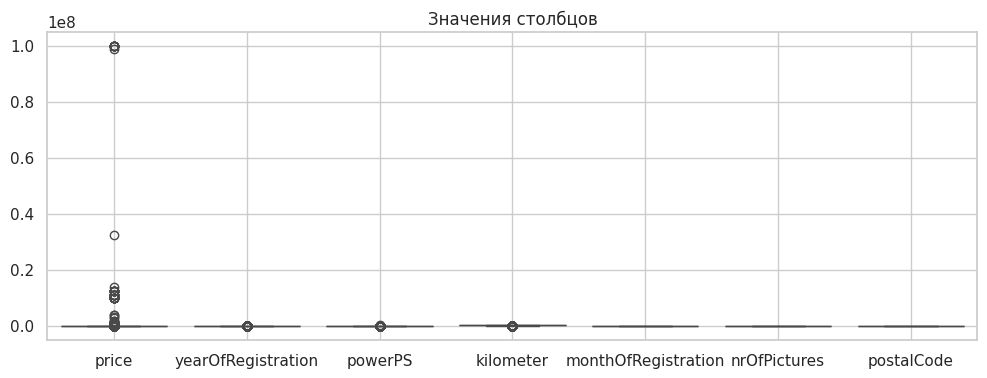

In [57]:
plt.figure(figsize=(12, 4))  # Увеличим размер графика для лучшей читаемости
#plt.boxplot(dt_frame, labels=dt_frame.columns) # matplotlib
sns.boxplot(data=df)  # seaborn
plt.title("Значения столбцов")
#plt.ylabel("Количество проданных автомобилей")
plt.grid(True)
plt.show()

In [95]:
min_vals = [df[i].min() for i in num_columns]
max_vals = [df[i].max() for i in num_columns]
all_columns = num_columns + dt_columns
print(min_vals)
print(max_vals)

[0.0, 0.0, 0.0, 5000.0, 0.0, 0.0]
[99999999.0, 9999.0, 150000.0, 150000.0, 12.0, 0.0]


In [18]:
print('Разброс значений столбов:')
for i in range(len(min_vals)):
  print(f'{all_columns[i]}: {max_vals[i] - min_vals[i]}')

Разброс значений столбов (для дат - в сутках):
price: 99999999.0
yearOfRegistration: 9999.0
powerPS: 150000.0
kilometer: 145000.0
monthOfRegistration: 12.0
nrOfPictures: 0.0
dateCrawled: 32
dateCreated: 358
lastSeen: 32


# **3. Удаление выбросов**

In [78]:
print('Удаление выбросовых значений')
print(f'Длина до удаления: {len(df)}')
cleaned_df = df
for i in num_columns:
  if i != 'nrOfPictures':
    mean = df[i].mean()
    std = df[i].std()
    cleaned_df = cleaned_df[(cleaned_df[i] < mean + std * 3) & (cleaned_df[i] > mean - std * 3)]
print(f'Длина после удаления: {len(cleaned_df)}')

Удаление выбросовых значений
Длина до удаления: 269342
Длина после удаления: 263945


# **4. Тепловая матрица кореляций**

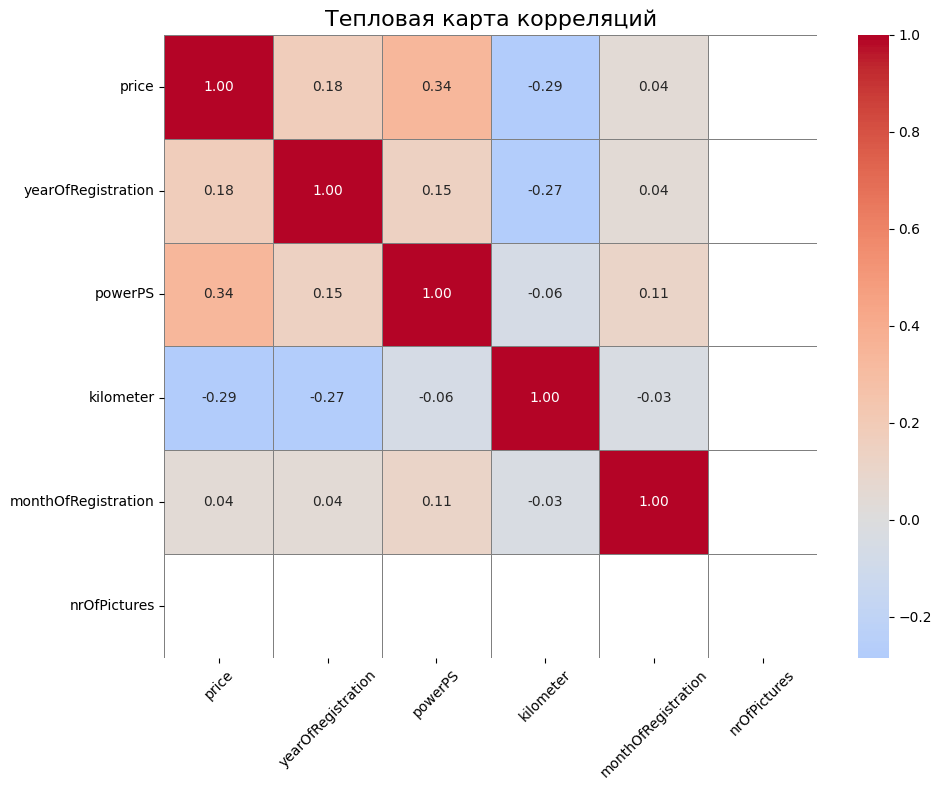

In [19]:
# Вычисляем матрицу корреляций
corr_matrix = cleaned_df[num_columns].corr()

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    linecolor='gray'
)

# Настройка заголовка
plt.title("Тепловая карта корреляций", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **5. Удаление столбцов**

In [79]:
edited_df = cleaned_df
del edited_df['monthOfRegistration']
del edited_df['nrOfPictures']

# **6. Гистограммы машин по маркам, типам автомобиля и топлива**

In [90]:
car_brands = dict()
car_types = dict()
fuel_types = dict()
for i in range(len(edited_df)):
  try:
    car_brands[edited_df['brand'][i]] += 1
  except KeyError:
    try:
      car_brands[edited_df['brand'][i]] = 1
    except KeyError:
      pass

  try:
    car_types[edited_df['vehicleType'][i]] += 1
  except KeyError:
    try:
      car_types[edited_df['vehicleType'][i]] = 1
    except KeyError:
      pass

  try:
    fuel_types[edited_df['fuelType'][i]] += 1
  except KeyError:
    try:
      fuel_types[edited_df['fuelType'][i]] = 1
    except KeyError:
      pass
car_brands = sorted(car_brands.items(), key=lambda item: item[1])
car_types = sorted(car_types.items(), key=lambda item: item[1])
fuel_types = sorted(fuel_types.items(), key=lambda item: item[1])
print(car_brands)
print(car_types)
print(fuel_types)

[('lada', 145), ('lancia', 322), ('trabant', 345), ('rover', 357), ('daewoo', 360), ('saab', 385), ('jaguar', 432), ('subaru', 526), ('land_rover', 538), ('jeep', 544), ('daihatsu', 553), ('dacia', 628), ('chrysler', 985), ('chevrolet', 1252), ('porsche', 1497), ('suzuki', 1595), ('alfa_romeo', 1651), ('kia', 1761), ('honda', 1991), ('mitsubishi', 2128), ('volvo', 2301), ('mini', 2347), ('sonstige_autos', 2349), ('hyundai', 2531), ('toyota', 3319), ('nissan', 3517), ('citroen', 3596), ('smart', 3651), ('mazda', 3956), ('skoda', 3992), ('seat', 4911), ('fiat', 6696), ('peugeot', 7727), ('renault', 12578), ('ford', 17826), ('audi', 23045), ('mercedes_benz', 24743), ('opel', 27964), ('bmw', 28172), ('volkswagen', 55437)]
[('andere', 2227), ('suv', 10325), ('coupe', 13181), ('cabrio', 15971), ('bus', 21256), ('unknown', 25205), ('kombi', 47251), ('kleinwagen', 55893), ('limousine', 67344)]
[('elektro', 58), ('andere', 110), ('hybrid', 199), ('cng', 401), ('lpg', 3811), ('unknown', 21989), 

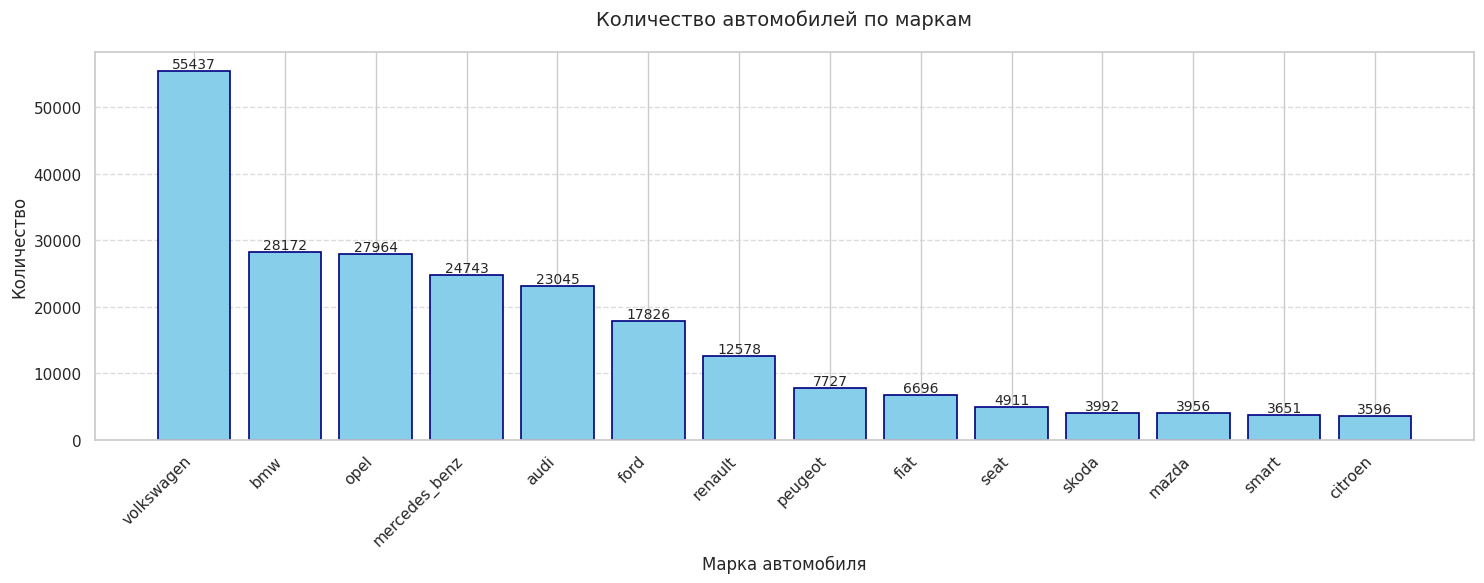

In [91]:
data = car_brands[:-15:-1]

# Разделяем данные на отдельные списки для удобства
brands = [item[0] for item in data]
counts = [item[1] for item in data]

# Создаем фигуру
plt.figure(figsize=(15, 6))

# Строим столбчатую диаграмму (гистограмму категориальных данных)
bars = plt.bar(brands, counts, color='skyblue', edgecolor='navy', linewidth=1.2)

# Добавляем значения над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom', fontsize=10)

# Настраиваем оформление
plt.title('Количество автомобилей по маркам', fontsize=14, pad=20)
plt.xlabel('Марка автомобиля', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Наклон подписей для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Автоматическая подгонка layout
plt.tight_layout()

# Показать график
plt.show()

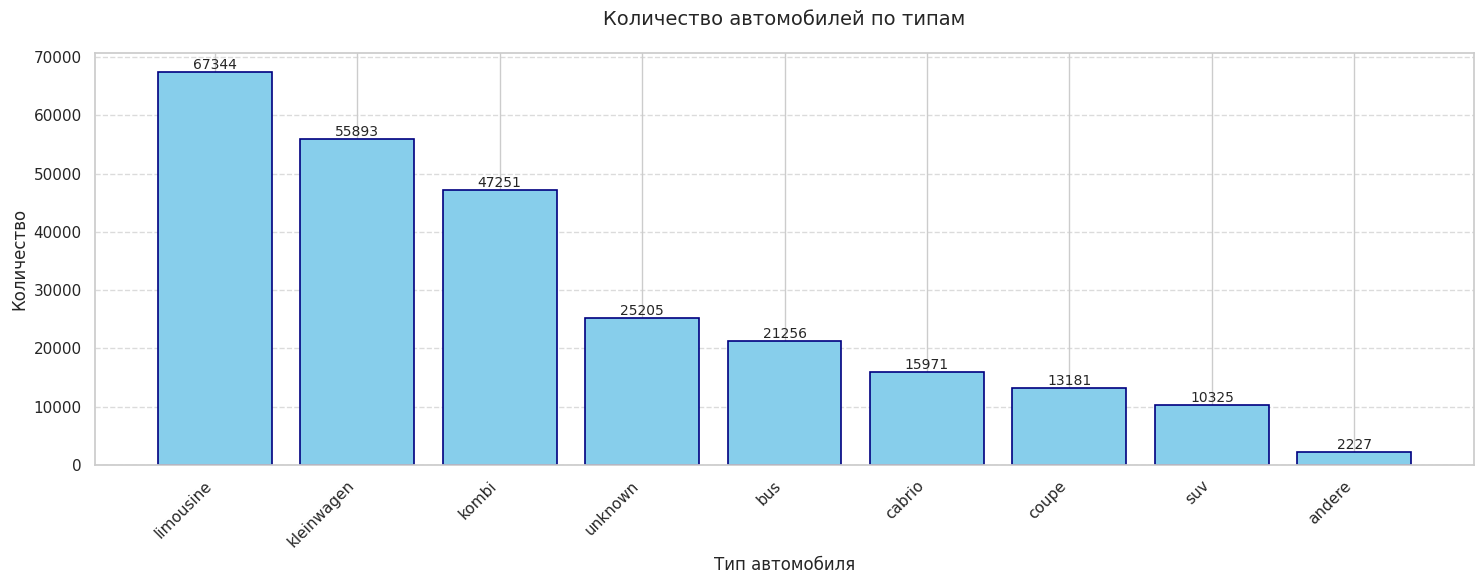

In [92]:
data = car_types[:-15:-1]

# Разделяем данные на отдельные списки для удобства
brands = [item[0] for item in data]
counts = [item[1] for item in data]

# Создаем фигуру
plt.figure(figsize=(15, 6))

# Строим столбчатую диаграмму (гистограмму категориальных данных)
bars = plt.bar(brands, counts, color='skyblue', edgecolor='navy', linewidth=1.2)

# Добавляем значения над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom', fontsize=10)

# Настраиваем оформление
plt.title('Количество автомобилей по типам', fontsize=14, pad=20)
plt.xlabel('Тип автомобиля', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Наклон подписей для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Автоматическая подгонка layout
plt.tight_layout()

# Показать график
plt.show()

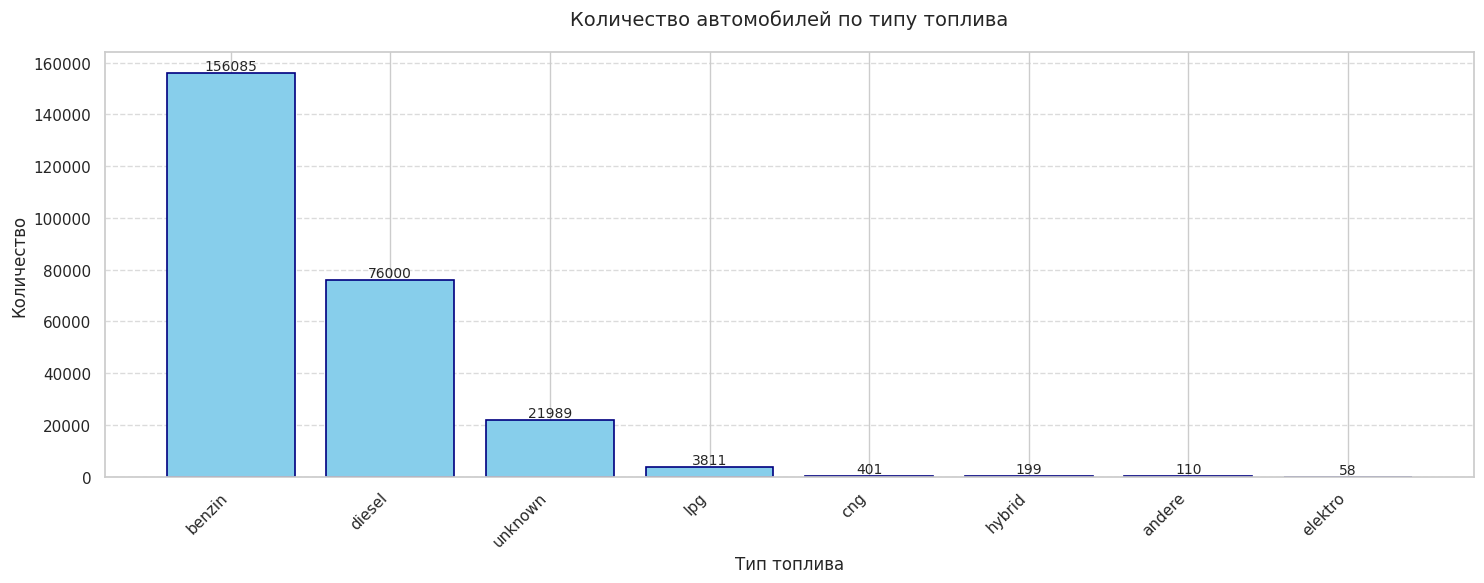

In [93]:
data = fuel_types[:-15:-1]

# Разделяем данные на отдельные списки для удобства
brands = [item[0] for item in data]
counts = [item[1] for item in data]

# Создаем фигуру
plt.figure(figsize=(15, 6))

# Строим столбчатую диаграмму (гистограмму категориальных данных)
bars = plt.bar(brands, counts, color='skyblue', edgecolor='navy', linewidth=1.2)

# Добавляем значения над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom', fontsize=10)

# Настраиваем оформление
plt.title('Количество автомобилей по типу топлива', fontsize=14, pad=20)
plt.xlabel('Тип топлива', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Наклон подписей для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Автоматическая подгонка layout
plt.tight_layout()

# Показать график
plt.show()

# **7. Добавление нового столбца**

In [28]:
name_length = []
for i in edited_df['name']:
  name_length.append(len(i))

In [31]:
edited_df['nameLength'] = name_length
arr = ['name', 'nameLength']
edited_df[arr]

,name,nameLength
0,Golf_3_1.6,10
1,A5_Sportback_2.7_Tdi,20
2,"Jeep_Grand_Cherokee_""Overland""",30
3,GOLF_4_1_4__3TЬRER,18
4,Skoda_Fabia_1.4_TDI_PD_Classic,30
...,...,...
269337,Suche_t4___vito_ab_6_sitze,26
269338,Smart_smart_leistungssteigerung_100ps,37
269339,Volkswagen_Multivan_T4_TDI_7DC_UY2,34
269340,VW_Golf_Kombi_1_9l_TDI,22


# **8. Коэффиценты Пирсона и Спирмена**

In [34]:
pearson_coef, pearson_p = pearsonr(edited_df['price'], edited_df['powerPS'])
print(f"Коэффициент Пирсона: {pearson_coef:.3f}, p-value: {pearson_p:.3f}")

spearman_coef, spearman_p = spearmanr(edited_df['price'], edited_df['powerPS'])
print(f"Коэффициент Спирмена: {spearman_coef:.3f}, p-value: {spearman_p:.3f}")

Коэффициент Пирсона: 0.339, p-value: 0.000
Коэффициент Спирмена: 0.553, p-value: 0.000


In [39]:
arr = ['price', 'powerPS']
cleaned_df[arr]

,price,powerPS
0,480.0,0.0
1,18300.0,190.0
2,9800.0,163.0
3,1500.0,75.0
4,3600.0,69.0
...,...,...
269337,2200.0,0.0
269338,1199.0,101.0
269339,9200.0,102.0
269340,3400.0,100.0


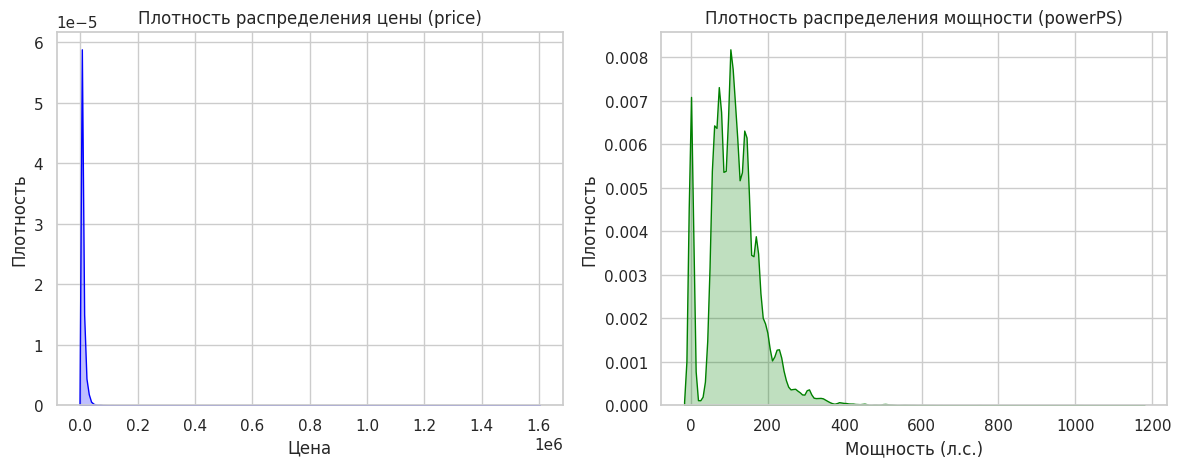

In [47]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# График плотности для 'price'
sns.kdeplot(data=cleaned_df['price'], ax=axes[0], fill=True, color='blue')
axes[0].set_title('Плотность распределения цены (price)')
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Плотность')

# График плотности для 'powerPS'
sns.kdeplot(data=cleaned_df['powerPS'], ax=axes[1], fill=True, color='green')
axes[1].set_title('Плотность распределения мощности (powerPS)')
axes[1].set_xlabel('Мощность (л.с.)')
axes[1].set_ylabel('Плотность')

plt.tight_layout()
plt.show()